In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Understanding and Exploration

In [6]:
#Reading the data
df1 = pd.read_csv('Car name.csv')
df2 = pd.read_json('Car-Attributes.json')

In [7]:
#Printing first 5rows of df1
df1.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [8]:
#Printing first 5 rows of df2
df2.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [9]:
#Merging both the dataframe
df = pd.concat([df1,df2],axis=1)

In [12]:
df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [13]:
#Checking the data types of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


* We can see that hp column data type is object, but it should be continuos.
* Also origin datatype is integer, but it should be categprical.
* Datatypes of rest of the columns are as required. i.e there is no unexpected values in rest of the columns.

In [14]:
#Converting the data types
df['origin'] = df['origin'].astype('category')

* If we convert datatype of hp to float, then it gives error. So there might be some unusual data in that column.

In [15]:
#Checking 5 point summary of the data
df.describe()

,mpg,cyl,disp,wt,acc,yr
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000


# Data Cleaning and Analysis

In [16]:
#Checking the missing/unexpected values on hp column
x= pd.DataFrame(df.hp.str.isdigit())
df[x['hp']==False]

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
32,ford pinto,25.0,4,98.0,?,2046,19.0,71,1
126,ford maverick,21.0,6,200.0,?,2875,17.0,74,1
330,renault lecar deluxe,40.9,4,85.0,?,1835,17.3,80,2
336,ford mustang cobra,23.6,4,140.0,?,2905,14.3,80,1
354,renault 18i,34.5,4,100.0,?,2320,15.8,81,2
374,amc concord dl,23.0,4,151.0,?,3035,20.5,82,1


There is 6 missing values in the hp column.

In [17]:
#Calculating the percentage of missing values on hp column
len(df[x['hp']==False])/len(df)*100

1.507537688442211

* We can see that, There are 1.507% values are missing/unexpected in the hp column
* We can replace the missing values ('?') with median.

In [18]:
#Replacing the missing/unexpected values with median
df['hp']=df['hp'].replace('?',df['hp'][df['hp']!='?'].median())

In [19]:
#Checking the missing values in other columns
df.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

We can see that apart from hp column, there is no missing values in other columns. So percentage of missing values in other columns is 0.

In [20]:
#Checking 5 point summary of the data
df.describe()

,mpg,cyl,disp,hp,wt,acc,yr
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [21]:
#Checking the duplicate values in the dataset
df.duplicated().any()

False

There is no duplicate value in the dataset.

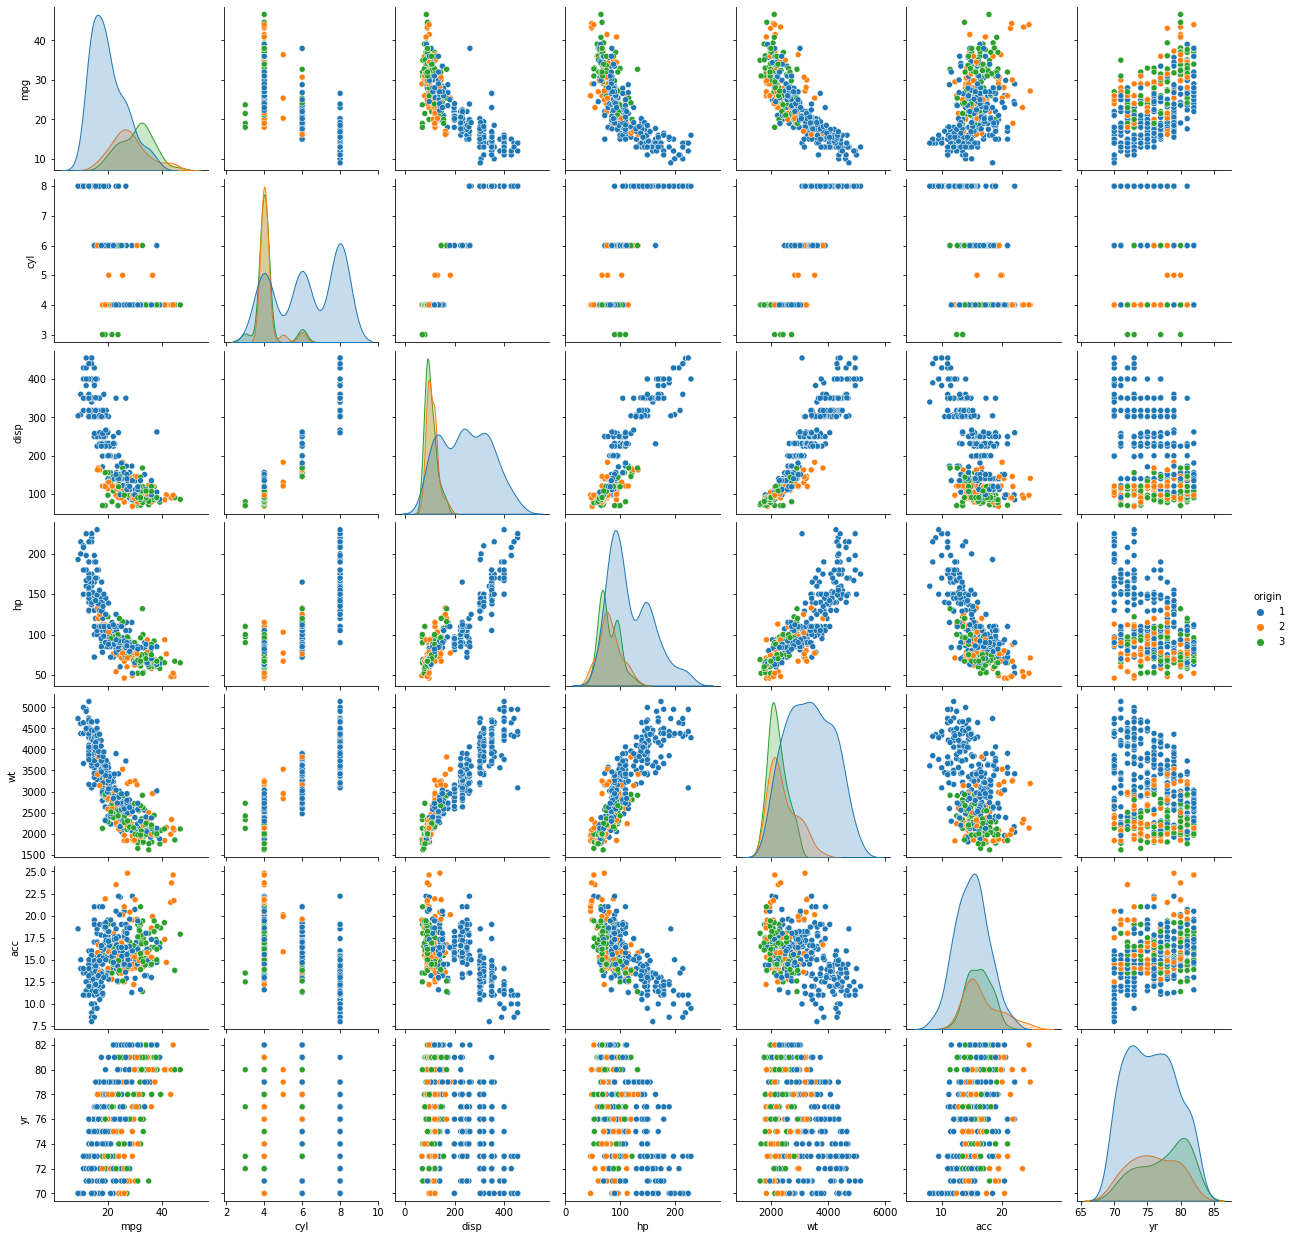

In [24]:
#Pairplot for all feature
sns.pairplot(df,diag_kind='kde',hue='origin')

* From the plot, we can see that there is a relationship between the some feature.

<AxesSubplot:xlabel='wt', ylabel='disp'>

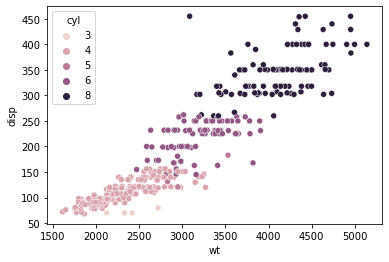

In [25]:
#Scatter plot between wt and disp distinguished by cyl
sns.scatterplot(x=df['wt'],y=df['disp'],hue=df['cyl'])

* We can see that, lower number of cylinders have low weight and displacement and high number cylinders have high weight and displacement. 
* Number of cylinders is directly related to weight an displacement.

<AxesSubplot:xlabel='wt', ylabel='mpg'>

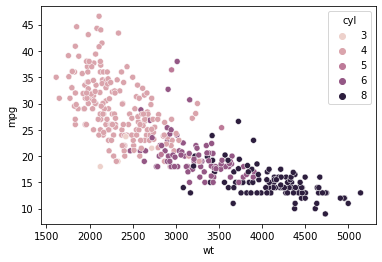

In [27]:
#Scatter plot between wt and mpg distinguished by cyl
sns.scatterplot(x=df['wt'],y=df['mpg'],hue=df['cyl'])

* We can see that, lower number of cylinders have low weight and high mpg, and high number cylinders have high weight and low mpg. 
* Number of cylinders is directly related to weight an inversely related to mpg.

<AxesSubplot:>

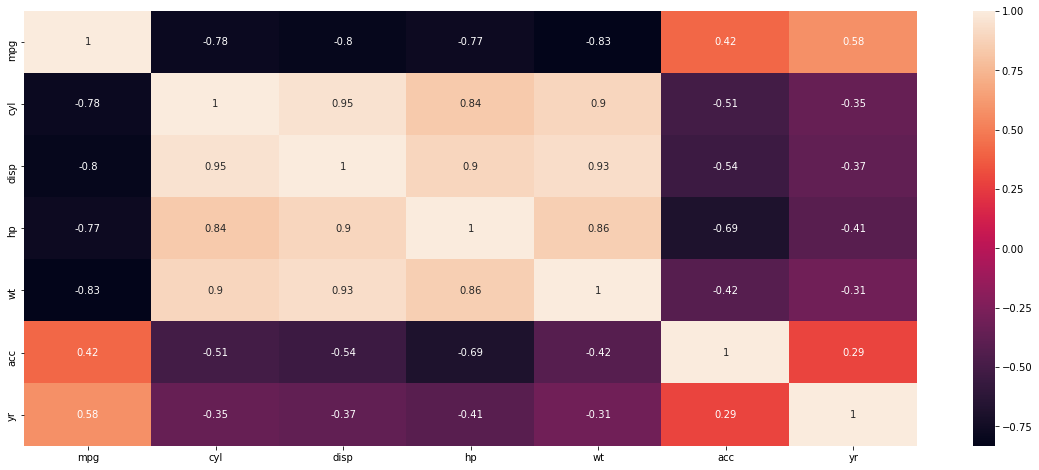

In [28]:
#Checking the correlation between the continuous variable
corr = df.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr, annot=True)

* mpg has a strong negative relationship with cyl, disp, hp and wt.
* cyl has a strong positive relationship with disp, hp, wt.
* disp has a strong positive relationship with hp, wt.
* hp has a strong positive relationship with wt.

([<matplotlib.patches.Wedge at 0x1648d52d130>,
 [Text(-0.42295633254055504, 1.015434853037773, '1'),
  Text(-0.17293561388226758, -1.0863209808574827, '2'),
  Text(0.9363126752779499, -0.5773374871891209, '3')],
 [Text(-0.23070345411303, 0.5538735562024215, ' 62.56%'),
  Text(-0.09432851666305503, -0.5925387168313542, ' 19.85%'),
  Text(0.5107160046970636, -0.3149113566486114, ' 17.59%')])

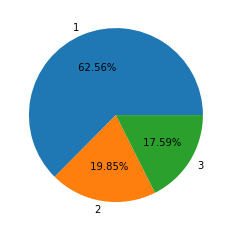

In [48]:
#Plotting pie plot for categorical variable
plt.pie(df['origin'].value_counts(),autopct='% 0.4g%%',labels=['1','2','3'])

# Clustering

In [49]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
x = df.drop('car_name',axis=1) #Dropping car name variable as it is not required for our analysis
scl = StandardScaler()
x_scaled = scl.fit_transform(x) #Scaling the variable
x_scaled_df = pd.DataFrame(x_scaled,columns=x.columns) #Converting scaled variable to dataframee

C:\Users\dell1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dell1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\dell1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dell1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

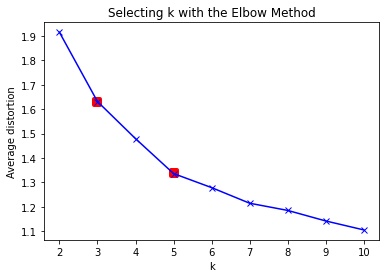

In [51]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(2,11)
meanDistortions=[]

for k in clusters:
    mod=KMeans(n_clusters=k)
    mod.fit(x_scaled)
    prediction=mod.predict(x_scaled)
    meanDistortions.append(sum(np.min(cdist(x_scaled, mod.cluster_centers_, 'euclidean'), axis=1)) / x_scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.scatter([3, 5],[1.63, 1.34],color = 'r',marker='s',linewidths=4)

* From the graph we can see that, 3 and 5 s the possible values of k.

In [52]:
# Clustering for K = 3
mod=KMeans(3)
mod.fit(x_scaled)
prediction=mod.predict(x_scaled)

#Appending the prediction 
df["GROUP"] = prediction
x_scaled_df["GROUP"] = prediction
print("Groups Assigned : \n")
df.head()

C:\Users\dell1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dell1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Groups Assigned : 



,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,1
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,1
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,1
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,1
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,1


In [53]:
#checking the mean of each clusters for each variable
df_cluster = df.groupby(by='GROUP')
df_cluster.mean()

,mpg,cyl,disp,hp,wt,acc,yr
GROUP,,,,,,,
0,30.420859,4.067485,103.638037,77.730061,2242.515337,16.296933,77.147239
1,14.715000,7.980000,346.370000,160.550000,4126.910000,12.721000,73.750000
2,21.694074,5.259259,188.544444,94.725926,2992.651852,16.797037,76.311111


array([[<AxesSubplot:title={'center':'acc'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'mpg'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'origin'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'yr'}, xlabel='[GROUP]'>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

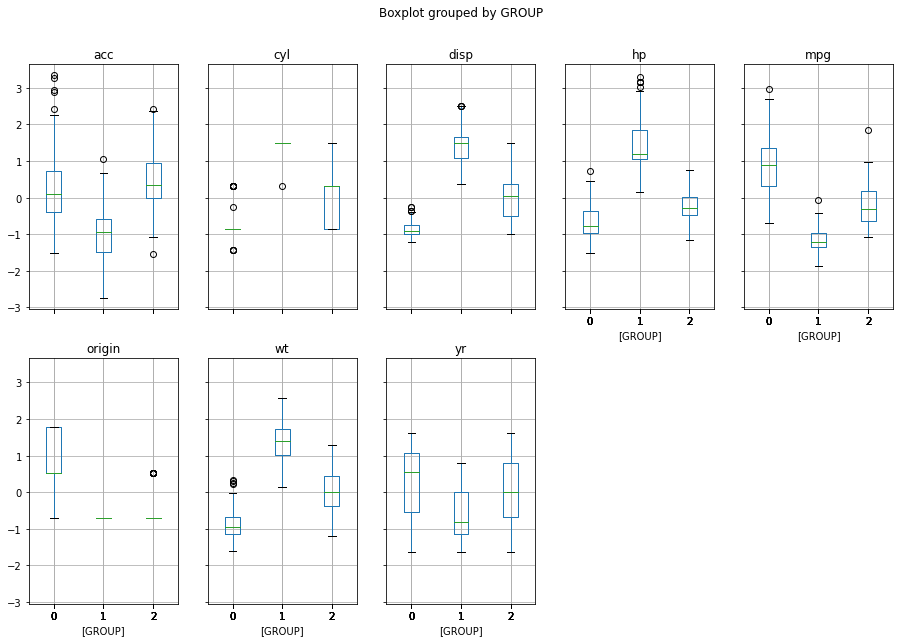

In [54]:
#Plotting the boxplot
x_scaled_df.boxplot(by='GROUP', layout = (2,5),figsize=(15,10))

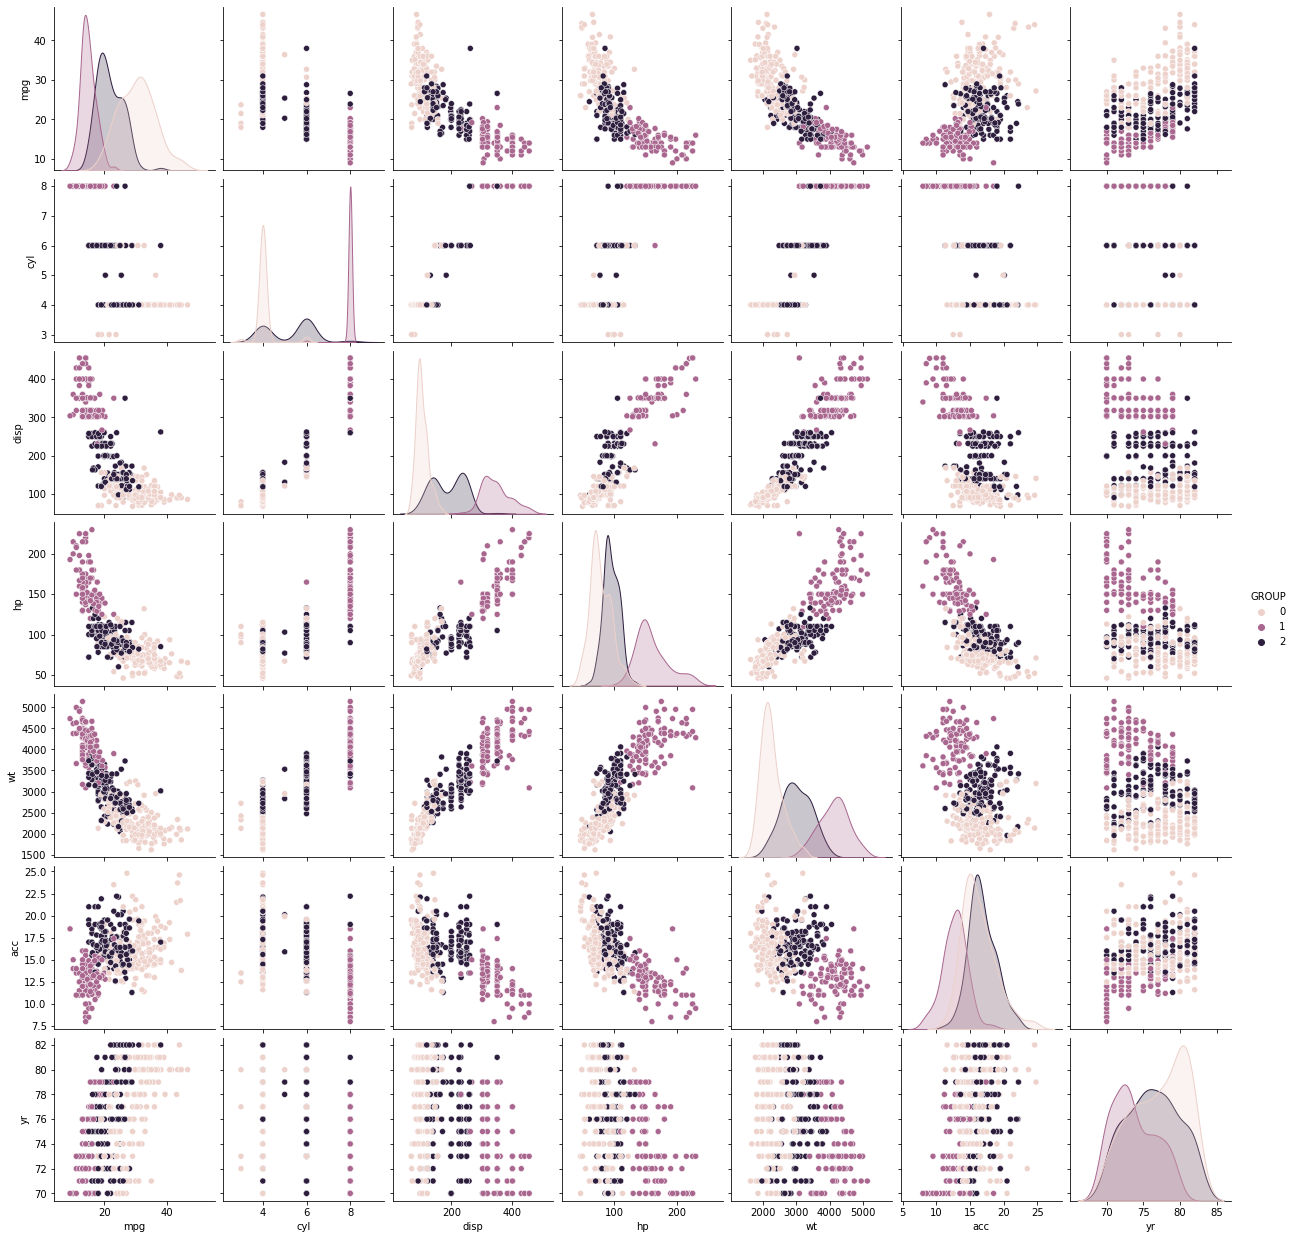

In [55]:
sns.pairplot(df,diag_kind='kde',hue='GROUP')

In [56]:
# Clustering for K = 5
mod=KMeans(5)
mod.fit(x_scaled)
prediction=mod.predict(x_scaled)

#Appending the prediction 
df["GROUP"] = prediction
x_scaled_df["GROUP"] = prediction
print("Groups Assigned : \n")
df.head()

C:\Users\dell1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dell1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Groups Assigned : 



,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,1
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,1
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,1
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,1
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,1


In [57]:
#checking the mean of each clusters for each variable
df_cluster = df.groupby(by='GROUP')
df_cluster.mean()

,mpg,cyl,disp,hp,wt,acc,yr
GROUP,,,,,,,
0,34.137500,4.083333,99.527778,72.875000,2155.819444,16.734722,79.416667
1,14.429787,8.000000,350.042553,162.393617,4157.978723,12.576596,73.468085
2,28.791045,4.194030,132.567164,82.865672,2563.805970,16.549254,79.671642
3,24.619048,4.047619,108.601190,85.672619,2347.619048,16.107143,73.309524
4,19.104938,6.222222,233.444444,101.882716,3298.580247,16.632099,75.703704


array([[<AxesSubplot:title={'center':'acc'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'mpg'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'origin'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'yr'}, xlabel='[GROUP]'>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

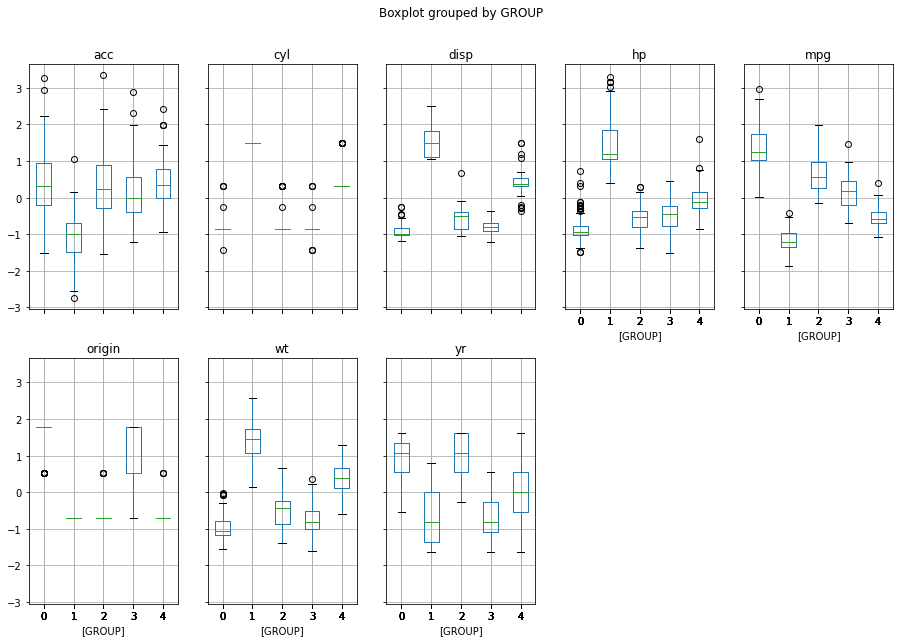

In [58]:
#Plotting the boxplot
x_scaled_df.boxplot(by='GROUP', layout = (2,5),figsize=(15,10))

C:\Users\dell1\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


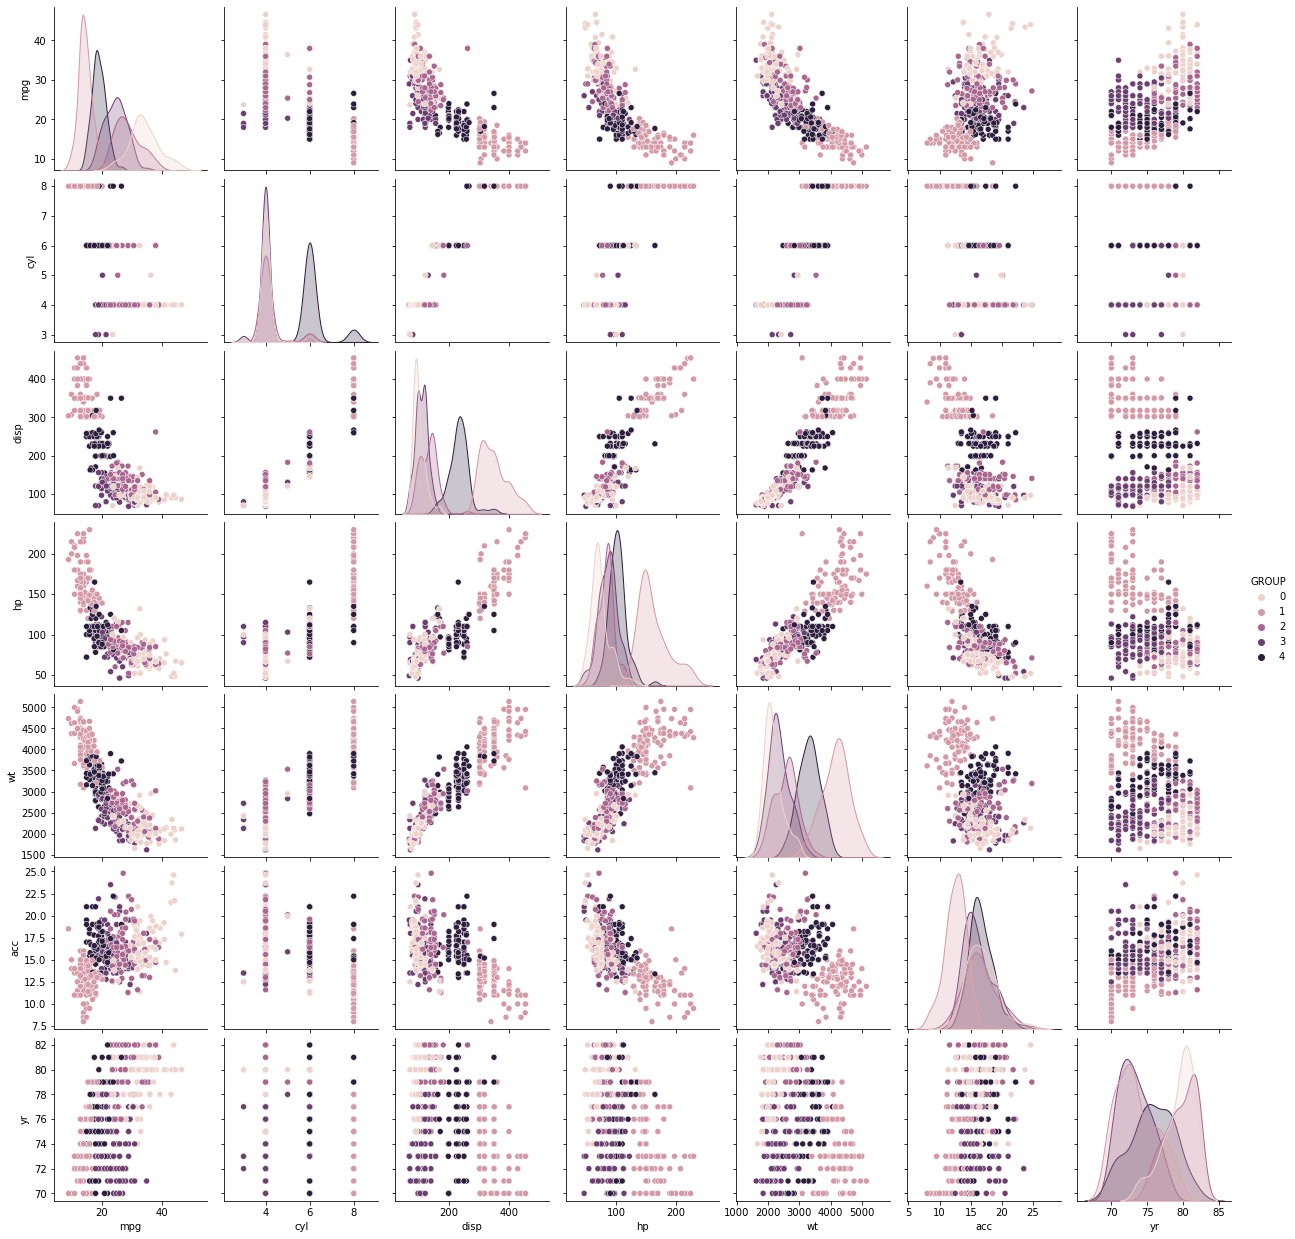

In [59]:
sns.pairplot(df,diag_kind='kde',hue='GROUP')

We can take 5 as the optimal value of k.

In [61]:
#Prediction for new datapoint
x = np.asarray([[17,8,300,120,400,13,70,2]])
print(mod.predict(scl.transform(x)))

[3]


C:\Users\dell1\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


The new data point belongs to '3' clusters.